In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
filepath = "iot23_sequential_benign&malicious.csv"
df_all = pd.read_csv(filepath)

In [4]:
filepath = "iot23_sequential_benign.csv"
df_benign = pd.read_csv(filepath)

In [5]:
# filepath = "iot23_sequential_mirai.csv"
# df_mirai = pd.read_csv(filepath)

In [6]:
filepath = "iot23_sequential_kenjiro.csv"
df_kenjiro = pd.read_csv(filepath)

In [7]:
# filepath = "iot23_sequential_ircbot.csv"
# df_ircbot = pd.read_csv(filepath)

In [8]:
# filepath = "iot23_sequential_okiru.csv"
# df_okiru = pd.read_csv(filepath)

In [9]:
# filepath = "iot23_sequential_gagfyt.csv"
# df_gagfyt = pd.read_csv(filepath)

In [10]:
# filepath = "iot23_sequential_hideandseek.csv"
# df_hideandseek = pd.read_csv(filepath)

In [11]:
# filepath = "iot23_sequential_hakai.csv"
# df_hakai = pd.read_csv(filepath)

In [12]:
# filepath = "iot23_sequential_torii.csv"
# df_torii = pd.read_csv(filepath)

In [13]:
del df_all['Unnamed: 0']
del df_benign['Unnamed: 0']
# del df_mirai['Unnamed: 0']
del df_kenjiro['Unnamed: 0']
# del df_ircbot['Unnamed: 0']
# del df_okiru['Unnamed: 0']
# del df_gagfyt['Unnamed: 0']
# del df_hideandseek['Unnamed: 0']
# del df_hakai['Unnamed: 0']
# del df_torii['Unnamed: 0']

In [14]:
df_all = df_all.values
df_benign = df_benign.values
# df_mirai = df_mirai.values
df_kenjiro = df_kenjiro.values
# df_ircbot = df_ircbot.values
# df_okiru = df_okiru.values
# df_gagfyt = df_gagfyt.values
# df_hideandseek = df_hideandseek.values
# df_hakai = df_hakai.values
# df_torii = df_torii.values

print(df_all.shape)
print(df_benign.shape)
# print(df_mirai.shape)
print(df_kenjiro.shape)
# print(df_ircbot.shape)
# print(df_okiru.shape)
# print(df_gagfyt.shape)
# print(df_hideandseek.shape)
# print(df_hakai.shape)
# print(df_torii.shape)

(1444654, 520)
(192079, 520)
(197396, 520)


In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(df_all)

MinMaxScaler()

In [17]:
normalized_benign = scaler.transform(df_benign)
# normalized_mirai = scaler.transform(df_mirai)
normalized_kenjiro = scaler.transform(df_kenjiro)
# normalized_ircbot = scaler.transform(df_ircbot)
# normalized_okiru = scaler.transform(df_okiru)
# normalized_gagfyt = scaler.transform(df_gagfyt)
# normalized_hideandseek = scaler.transform(df_hideandseek)
# normalized_hakai = scaler.transform(df_hakai)
# normalized_torii = scaler.transform(df_torii)

In [18]:
normalized_benign.shape

(192079, 520)

In [19]:
df_benign = normalized_benign.reshape(normalized_benign.shape[0], 20, 26)
# df_mirai = normalized_mirai.reshape(normalized_mirai.shape[0], 20, 26)
df_kenjiro = normalized_kenjiro.reshape(normalized_kenjiro.shape[0], 20, 26)
# df_ircbot = normalized_ircbot.reshape(normalized_ircbot.shape[0], 20, 26)
# df_okiru = normalized_okiru.reshape(normalized_okiru.shape[0], 20, 26)
# df_gagfyt = normalized_gagfyt.reshape(normalized_gagfyt.shape[0], 20, 26)
# df_hideandseek = normalized_hideandseek.reshape(normalized_hideandseek.shape[0], 20, 26)
# df_hakai = normalized_hakai.reshape(normalized_hakai.shape[0], 20, 26)
# df_torii = normalized_torii.reshape(normalized_torii.shape[0], 20, 26)

print(df_benign.shape)
# print(df_mirai.shape)
print(df_kenjiro.shape)
# print(df_ircbot.shape)
# print(df_okiru.shape)
# print(df_gagfyt.shape)
# print(df_hideandseek.shape)
# print(df_hakai.shape)
# print(df_torii.shape)

(192079, 20, 26)
(197396, 20, 26)


In [20]:
df_benign = np.append(df_benign, np.zeros((len(df_benign),len(df_benign[0]),1)), axis=2)
# df_mirai = np.append(df_mirai, np.ones((len(df_mirai),len(df_mirai[0]),1)), axis=2)
# df_kenjiro = np.append(df_kenjiro, np.full((len(df_kenjiro),len(df_kenjiro[0]),1), 2), axis=2)
# df_ircbot = np.append(df_ircbot, np.full((len(df_ircbot),len(df_ircbot[0]),1), 3), axis=2)
# df_okiru = np.append(df_okiru, np.full((len(df_okiru),len(df_okiru[0]),1), 4), axis=2)
# df_gagfyt = np.append(df_gagfyt, np.full((len(df_gagfyt),len(df_gagfyt[0]),1), 5), axis=2)
# df_hideandseek = np.append(df_hideandseek, np.full((len(df_hideandseek),len(df_hideandseek[0]),1), 6), axis=2)
# df_hakai = np.append(df_hakai, np.full((len(df_hakai),len(df_hakai[0]),1), 7), axis=2)
# df_torii = np.append(df_torii, np.full((len(df_torii),len(df_torii[0]),1), 8), axis=2)
df_kenjiro = np.append(df_kenjiro, np.ones((len(df_kenjiro),len(df_kenjiro[0]),1)), axis=2)

In [31]:
# np_dataset = np.vstack([df_benign, df_mirai, df_kenjiro, df_ircbot, df_okiru, df_gagfyt, df_hideandseek, df_hakai, df_torii])
np_dataset = np.vstack([df_benign, df_kenjiro])

print(np_dataset.shape)

(389475, 20, 27)


In [32]:
x_data = np_dataset[:,:,:-1]
labels = np_dataset[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(389475, 20, 26)
(389475,)


In [33]:
labels

array([0., 0., 0., ..., 2., 2., 2.])

In [23]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=2)
y_data.shape

IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, random_state=10, test_size=0.2)

In [ ]:
print(X_train.shape, Y_train.shape) # 학습데이터 및 정답레이블
print(X_test.shape, Y_test.shape) #검증데이터 및 정답레이블

(466544, 20, 26) (466544, 2)
(116636, 20, 26) (116636, 2)


In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=64, activation='relu', input_shape=X_train.shape[1:3], return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23296     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 25,442
Trainable params: 25,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time

In [ ]:
start = time.time()
print('program start...')
print()

history = model.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    batch_size=1024, 
    validation_data=(X_test,Y_test),
    verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/10
456/456 [==============================] - 27s 57ms/step - loss: 0.2955 - accuracy: 0.8095 - val_loss: 0.2467 - val_accuracy: 0.8266
Epoch 2/10
456/456 [==============================] - 26s 56ms/step - loss: 0.2886 - accuracy: 0.8181 - val_loss: 0.2472 - val_accuracy: 0.8257
Epoch 3/10
456/456 [==============================] - 26s 56ms/step - loss: 0.2552 - accuracy: 0.8214 - val_loss: 0.2471 - val_accuracy: 0.8202
Epoch 4/10
456/456 [==============================] - 26s 58ms/step - loss: 0.2464 - accuracy: 0.8237 - val_loss: 0.2445 - val_accuracy: 0.8292
Epoch 5/10
456/456 [==============================] - 26s 57ms/step - loss: 0.2414 - accuracy: 0.8302 - val_loss: 0.2383 - val_accuracy: 0.8319
Epoch 6/10
456/456 [==============================] - 26s 57ms/step - loss: 0.2390 - accuracy: 0.8318 - val_loss: 0.2374 - val_accuracy: 0.8321
Epoch 7/10
456/456 [==============================] - 26s 57ms/step - loss: 0.2385 - accuracy: 0.8322 - val_loss: 0.23

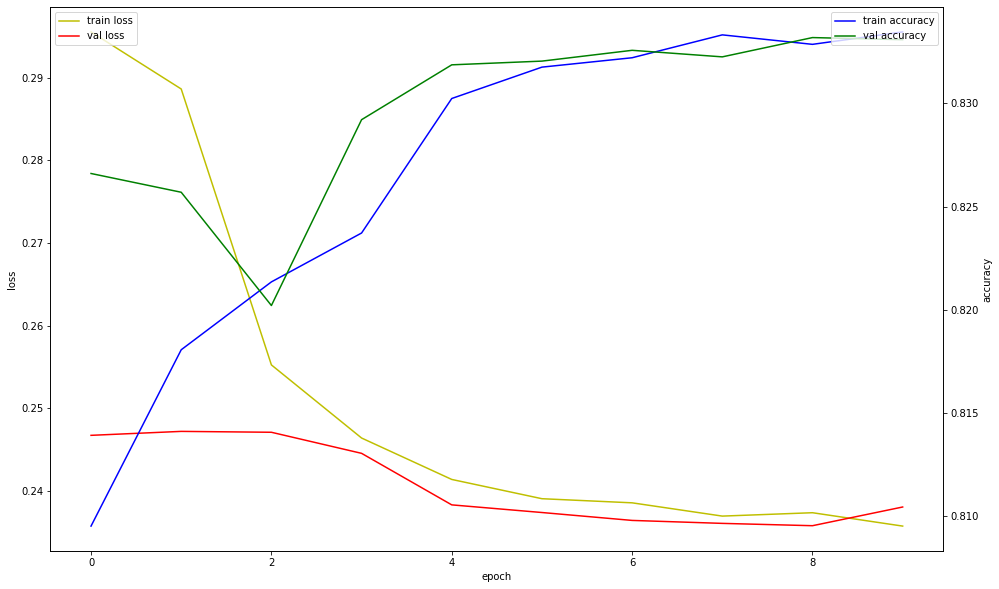

In [ ]:
fig, loss_ax = plt.subplots(figsize = (16,10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [ ]:
model.save('model_LSTM.h5')

In [ ]:
new_model = tf.keras.models.load_model('model_LSTM.h5')

In [ ]:
Y_test.shape

(116636, 2)

In [ ]:
X_test.shape

(116636, 20, 26)

In [ ]:
test_loss, test_acc = new_model.evaluate(X_test, Y_test, verbose=1)

3645/3645 [==============================] - 7s 2ms/step - loss: 0.2380 - accuracy: 0.8331
